# Funciones de distribución de probabilidades
  ### Distribución uniforme

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Distribución uniforme (todos son igual de probables)
#Función uniform

a=  1    #límite inferior
b = 1000  #límite superior
n = 10000000  #muestras    <-------------------- Entre más grande sea la muestra, es mayor la uniformidad
data = np.random.uniform(a, b, n)


(array([ 999159., 1000687.,  998669.,  999821.,  999102.,  998798.,
        1000664.,  999227., 1001841., 1002032.]),
 array([  1.0000353 , 100.90002862, 200.80002194, 300.70001526,
        400.60000858, 500.5000019 , 600.39999522, 700.29998854,
        800.19998186, 900.09997518, 999.9999685 ]),
 <a list of 10 Patch objects>)

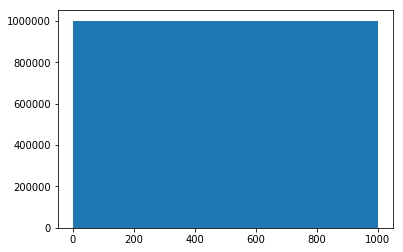

In [14]:
# Crear gráfico para demostrar uniformidad en los datos (histograma cuadrado)
%matplotlib inline
plt.hist(data)

### Distribución normal

In [29]:
#Función randn (media 0 y desviación típica 1)
datan = np.random.randn(1000000)

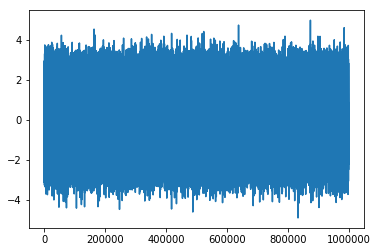

In [32]:
x = range(1,1000001)
plt.plot(x, datan)

(array([4.20000e+01, 1.68500e+03, 2.43060e+04, 1.43077e+05, 3.41892e+05,
        3.33669e+05, 1.32631e+05, 2.12610e+04, 1.40700e+03, 3.00000e+01]),
 array([-4.90386024, -3.91735532, -2.93085039, -1.94434547, -0.95784055,
         0.02866437,  1.0151693 ,  2.00167422,  2.98817914,  3.97468406,
         4.96118899]),
 <a list of 10 Patch objects>)

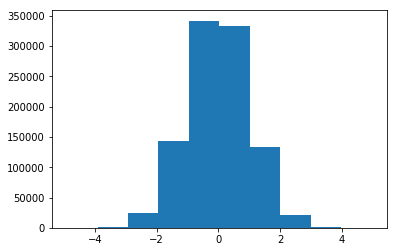

In [36]:
plt.hist(datan)

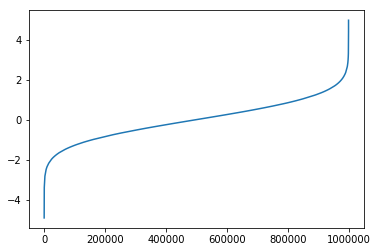

In [35]:
# Gráfico con valores ordenados
plt.plot(x, sorted(datan))

### Distribución con media y desviación estándar específicas

(array([ 3.,  5.,  7., 14., 20., 24., 17.,  6.,  3.,  1.]),
 array([ 5.0659883 ,  5.68342297,  6.30085764,  6.9182923 ,  7.53572697,
         8.15316164,  8.77059631,  9.38803098, 10.00546565, 10.62290032,
        11.24033499]),
 <a list of 10 Patch objects>)

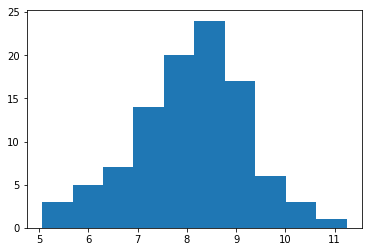

In [41]:
mu = 5.5  #media
sd = 2.5  #desviación típica
z = np.random.randn(100)
datane = mu +sd + z # Z = (x - mu / sd)  Teoría central del límite (tipificar), convertir variables aleatorias en normal
# Z = (x - mu / sd)  --->  despejando --->  X = mu + sd * Z
plt.hist(datane)

In [45]:
#Construir muestras con numpy

   #2 arreglos con 4 valores cada arreglo
set1 = np.random.randn(2,4)
set1


array([[ 0.32710472, -1.51081774, -1.87532657,  1.46633784],
       [ 0.9091986 , -1.50116639, -1.33487607, -0.92130104]])

# Simulación de MonteCarlo

###### Generamos dos números aleatorios uniformes entre 0 y 1
###### Calcularemos (x*x) + (y*y)
   * Si el valor es inferior a 1 estamos dentro del círculo
   * Si el valor es superior a 1 estamos fuera del círculo

* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos
para obtener una aproximación de la probabilidad de caer dentro del círculo.

* Usamos dicha probabilidad para aproximar el valor del pi
* Repetimos el experimiento un número suficiente de veces, para obtener diferentes aproximaciones de pi.


In [62]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list =[]
    for i in range (n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = (x [j]* x[j]) + (y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

        pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1405880000000006


(3.1405880000000006, [<matplotlib.lines.Line2D at 0x262b33ba2e8>])

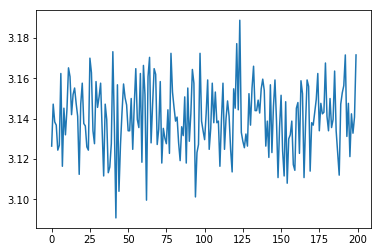

In [65]:
# cantidad de números aleatorios (1000), y repetición de experimentos (200)
pi_montecarlo(10000,200)

# Dummy Data Sets

In [77]:
# Creando un data set con dummies

import pandas as pd

n = 1000  #<--- Cantidad de datos a generar

data= pd.DataFrame(
    {'Normal': np.random.randn(n),
     'Normal_media_desvest': 1.5 + 2.5 * np.random.randn(n),
     'Uniforme': np.random.uniform(5,32,n)}
)

In [78]:
data.head()

,Normal,Normal_media_desvest,Uniforme
0,-1.742123,-0.356372,9.498395
1,-0.898156,5.389370,28.221024
2,-0.047894,-1.553220,29.039067
3,0.277109,0.940634,20.252364
4,0.139437,4.539112,18.474473


In [79]:
data.describe()
# Las medias y las desviaciones estándar se muestran tal como se solicitó la construcción

,Normal,Normal_media_desvest,Uniforme
count,1000.000000,1000.000000,1000.000000
mean,-0.012939,1.418914,18.925217
std,0.987153,2.393686,7.967331
min,-2.991961,-7.658148,5.069953
25%,-0.698656,-0.186764,11.704298
50%,-0.036698,1.249049,19.000284
75%,0.705126,3.048758,25.969423
max,3.230919,10.513283,31.995813


(array([  9.,  33.,  82., 190., 248., 200., 160.,  59.,  15.,   4.]),
 array([-2.99196117, -2.36967316, -1.74738515, -1.12509713, -0.50280912,
         0.11947889,  0.7417669 ,  1.36405491,  1.98634292,  2.60863093,
         3.23091895]),
 <a list of 10 Patch objects>)

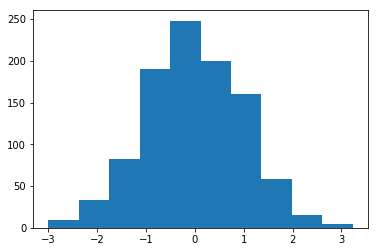

In [80]:
plt.hist(data['Normal'])

(array([  2.,   6.,  48., 163., 306., 250., 163.,  46.,  12.,   4.]),
 array([-7.65814811, -5.84100495, -4.0238618 , -2.20671864, -0.38957548,
         1.42756768,  3.24471083,  5.06185399,  6.87899715,  8.69614031,
        10.51328346]),
 <a list of 10 Patch objects>)

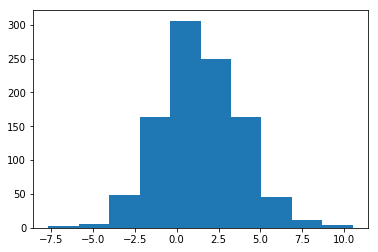

In [81]:
plt.hist(data['Normal_media_desvest'])

(array([102.,  94., 100.,  89., 100.,  83., 101., 103., 121., 107.]),
 array([ 5.06995264,  7.76253871, 10.45512477, 13.14771084, 15.84029691,
        18.53288297, 21.22546904, 23.9180551 , 26.61064117, 29.30322724,
        31.9958133 ]),
 <a list of 10 Patch objects>)

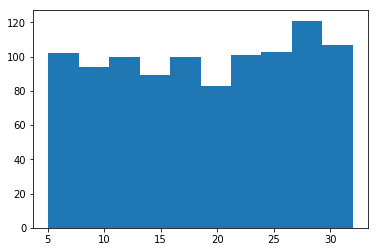

In [82]:
plt.hist(data['Uniforme'])

# Ejercicios con data set 'Churn Model'

In [83]:
#Extraer datos
data2 = pd.read_csv('F:\BD\GitHub\mlearningcourse\datasets\customer-churn-model\customer churn model.txt')

In [84]:
#Lista con nombres de columnas
column_names = data2.columns.values.tolist()

In [85]:
#Cantidad de columnas
a = len(column_names)
a

21

In [90]:
#Construir nuevo DataFrame con lista construida con el nombre de las columnas
new_data = pd.DataFrame({
    'Column Name': column_names,
    'Normal': np.random.randn(a),
     'Normal_media_desvest': 1.5 + 2.5 * np.random.randn(a),
     'Uniforme': np.random.uniform(0,1,a)
}) #, index = range(42,42 +a))   <---- Agregar index, si queremos filtrar a partir de cierto número de fila

In [91]:
new_data

,Column Name,Normal,Normal_media_desvest,Uniforme
0,State,-0.255163,-0.992187,0.295642
1,Account Length,-0.363696,5.824422,0.146910
2,Area Code,-0.494338,1.143391,0.420167
3,Phone,-0.846565,2.435848,0.156512
4,Int'l Plan,-0.018691,0.033593,0.281081
5,VMail Plan,-0.933016,2.792315,0.936792
6,VMail Message,-1.015670,-0.440529,0.308945
7,Day Mins,0.257792,-0.188041,0.088963
8,Day Calls,0.865296,-1.800719,0.701056
9,Day Charge,-0.154325,2.752387,0.777746
